In [ ]:
import random
from random import choice
from numpy.random import randint
import numpy as np

In [ ]:
def creating_Population_of_bitStrings(size, n_bits):
  Population = []
  for i in range(0, size):
    Bitstring = ''.join(choice('01') for _ in range(n_bits))
    Population.append(Bitstring)
  return Population

# Source: https://stackoverflow.com/questions/22609509/python-generate-a-string-of-bits

In [ ]:
def Mutation(Child, mutation_rate):
  Mutated = ''
  for x in range(0, len(Child)):  # go trough index of bit string
    if round(random.random(),2) < mutation_rate: # if random float number is less than mutation rate, meaning mutation happends,  and index has value 1
      if Child[x] == '1':        
        Mutated += '0'                   #Value is changed to 0
      else:                                                  
        Mutated += '1'
    else:
      Mutated+=Child[x]
  return Mutated

In [ ]:
def fitness(Population):
  val = []
  scores = []
  for x in range(0, len(Population)):
    score = 0
    for i in range(0, len(Population[x])):
      if(Population[x][i] == '1'):
        score+=1
    val.append([x, score])
    scores.append(score)
  return sorted(val, reverse = True, key = lambda x: x[1]), scores

In [ ]:
# Tournament selection
def selection(Population, fittest, K=3):
  # Get a random position from the population
  position = randint(len(Population))
  # For two individuals
  for x in randint(0, len(Population), K-1):
    # If score of random position is lower than the chosen position 
    if fittest[position][1] < fittest[x][1]:
      # Update the position
      position = x
      # Return the best bit string
  return Population[fittest[position][0]]
  
  # https://www.geeksforgeeks.org/tournament-selection-ga/
  # https://machinelearningmastery.com/simple-genetic-algorithm-from-scratch-in-python/

In [ ]:
def crossover(Parent1, Parent2, crossover_rate):
  child1 = Parent1
  child2 = Parent2
  if round(random.random(),2) < crossover_rate:
    point = random.randint(1, len(Parent1)-1)
    child1 = Parent1[:point] + Parent2[point:]
    child2 = Parent2[:point] + Parent1[point:]
  return [child1, child2]
  
  # https://machinelearningmastery.com/simple-genetic-algorithm-from-scratch-in-python/

In [ ]:
def GA(population_size, bit_size, mutation_rate, cross_rate, gen_stop):
    # Init variables and population
    number_of_generations = 0
    Population = creating_Population_of_bitStrings(population_size, bit_size)
    Top_bitstring = 0
    Best_score = 0
    scores = []
    Top_scores = []
    score_average = []
    deviation = []
    # Go through generations
    print(f'Initialize generations....')
    while(Best_score != bit_size):
      best, scores = fitness(Population)
      score_average.append(np.average(scores))
      deviation.append(np.std(scores))
      Top_scores.append(best[0][1])
      # Find best score
      if Best_score < best[0][1]:
        Top_bitstring = Population[best[0][0]]
        Best_score = best[0][1]
      # Selection of best parents
      sel = [selection(Population, best) for x in range(0, population_size)]
      """
      new_pop = []
      for x in sel:
        mutated = Mutation(x, mutation_rate)
        new_pop.append(mutated)
      Population = new_pop
      """
      Children = []
      # For half the population size
      for x in range(0, population_size, 2):
        # Create children using selected parents
        for c in crossover(sel[x], sel[x+1], cross_rate):
          # Apply mutation to children created
          mutated = Mutation(c, mutation_rate)
          Children.append(mutated)
      # New generation created    
      Population = Children
      best = fitness(Population)
      number_of_generations+=1
      print(f'Top score for generation {number_of_generations}: {Best_score}')
      print(f'{Top_bitstring}\n')
      if number_of_generations >= gen_stop:
        return Top_scores,score_average,deviation, number_of_generations, mutation_rate, cross_rate 
    return Top_scores,score_average,deviation, number_of_generations, mutation_rate, cross_rate 
# https://machinelearningmastery.com/simple-genetic-algorithm-from-scratch-in-python/

In [ ]:
# Test functions
pop = creating_Population_of_bitStrings(100, 100)
print("Checking bit string")
print(pop[0])
print("\nChecking fitness")
fit, scores = fitness(pop)
# ID of bitstring, fitness score
print(fit[0])
print(pop[fit[0][0]])
print(sorted(scores, reverse = True))
print("\nTesting selected")
selected = selection(pop, fit)
selected1 = selection(pop, fit)
print("Parent 1: " + selected)
print("Parent 2: " + selected1)
print("\nCrossover Test")
children = crossover(selected, selected1, 0.40)
print(children)
# Test mutation
print("\nChecking mutation")
mut = Mutation(children[0], 0.1)
for x in range(0, len(children[0])):
  if mut[x] != children[0][x]:
    print("Mutation happend")
    break;
print(f'Old bitstring: {children[0]}')
print(f'New bitstring: {mut}')

Checking bit string
1000100001000111001110101101100000101001110111100101010100100111011011100000111010001100100110101111

Checking fitness
[29, 59]
0011100111100101110011001101011111011011100010100010011110011111111110100110100010101001011111010110
[59, 59, 58, 57, 57, 57, 56, 56, 56, 55, 55, 55, 55, 55, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 53, 53, 53, 53, 53, 53, 53, 53, 52, 52, 52, 51, 51, 51, 51, 51, 51, 51, 50, 50, 50, 50, 50, 50, 49, 49, 49, 49, 49, 49, 48, 48, 48, 48, 48, 48, 48, 48, 48, 47, 47, 47, 47, 47, 47, 47, 46, 46, 46, 46, 46, 46, 46, 45, 45, 45, 45, 45, 45, 45, 45, 44, 44, 44, 44, 44, 44, 44, 42, 42, 41, 40, 40, 40, 38, 36]

Testing selected
Parent 1: 0011100100011011101100110110101110000100000101111010000111101000101110111011011011011111010010010011
Parent 2: 0011101110100000101001000011010001110010111001001110011110001111100010001101000011001111011111101011

Crossover Test
['00111001000110111011001101101011100001000001011110100001111010001011101110110110110111110100

In [ ]:
import matplotlib.pyplot as plt
def plotting(runs, gens, top, av, dev, mut, cross,tittle):
  plt.title(tittle)
  plt.xlabel("Runs")
  plt.ylabel("Generations")

  t = []
  a = []
  d = []

  for k in range(0, len(runs)):
    t.append(sorted(top[k], reverse = True)[0])
    a.append(np.average(av[k]))
    d.append(np.std(dev[k]))

  plt.plot(runs, t, label= f'Top score(MAX {bit_length})')
  plt.axhline(y= bit_length, linestyle='dotted', color = "black", label = "Target score")
  plt.plot(runs, a, label= "Average score")
  plt.plot(runs, d, label= "Deviation score")
  plt.plot(runs, gens, label= f'Generations(MAX {gen_stop})')
  plt.legend()
  plt.show

In [ ]:
def _score(list_name, key_string1, key_string2, score_division):
  print(list_name[0].keys())
  a = []
  b = []
  for x in list_name:
    a.append(x.get(key_string1))
    b.append(x.get(key_string2))
  b = [i/score_division for i in b]
  return a, b 

In [ ]:
def plot2(list,text1, text2, number):
  plt.title(f'{text1} and {text2} {len(runs)} runs')
  plt.xlabel("Runs")

  a, b = _score(list, text1, text2, number)
  x = np.arange(len(b))

  plt.plot(x, b, label= f'{text2}/{number}')
  plt.plot(x, a, label= text1)
  plt.legend()

In [ ]:
# Need to test 10, 100 and 1000 bit string length

# Check different mutation rate and cross rate

# 30 runs

bit_length = 1000
pop_size = 1000
mutation_rate = 0.002
cross_rate = 0.60
runs = 30

gens = []
top = []
av = []
dev = []
mut = []
cr = []

mut_and_score = []
cr_and_score = []

gen_stop = 500

for x in range(0, runs):
  print(f'Run number {x} initialize')
  t, a, d, g, m, c = GA(pop_size, bit_length, mutation_rate, cross_rate, gen_stop)
  gens.append(g)
  top.append(t)
  av.append(a)
  dev.append(d)
  cr.append(c)
  mut.append(m)
  mut_and_score.append(dict(m_rate = mutation_rate, t_score = sorted(t, reverse = True)[0]))
  cr_and_score.append(dict(c_rate = cross_rate, t_score = sorted(t, reverse = True)[0]))
  #mutation_rate+=0.01
  #cross_rate+=0.03
  print(f'Run number {x} finished')
runs = np.arange(0, runs)

Streaming output truncated to the last 5000 lines.
1111011110111111111111111111111111110111111111111111111111111100111111111011111101111111111111111111111111111001111111111101111111111111111111111111101111110101111111111101101111011111111011111011111111111111111111111111100111111111101111011111111111111110111111111111111111111111101111111111011111111111111111111111111011011111111111111111111111111111111111011011110111110110111111111111111011111111111111110111111111111111111110011111111111101111011101101111111111111111111111111111111111111111101111111111011111111111111111111111111111011011111111110101110111111111111111111111111110110111111111111111111110111111111111111111111111111111111111111111101111011011111111111111111110111110111111111110111111111111111111111111111111111111110111111111111111111111111111111111111111011111111111111111110011111111011111111101111111111101111011111111111111011111111111110011111110111111111111111011111111111111111111111111111111110111111111011111110111111

In [ ]:
plotting(runs, gens, top, av, dev, mut, cr, f'Fitness plots over {len(runs)} runs')

dict_keys(['m_rate', 't_score'])


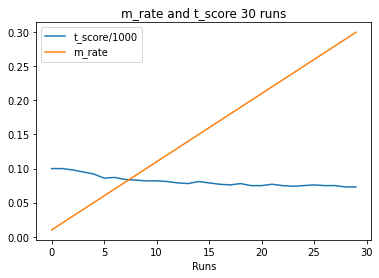

In [ ]:
plot2(mut_and_score,"m_rate", "t_score", 1000)

dict_keys(['c_rate', 't_score'])


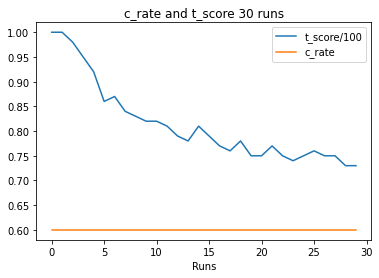

In [ ]:
plot2(cr_and_score,"c_rate", "t_score", 100)